# Figure 1

In [ ]:
!wget -O tcga_dataset.txt.gz "https://toil-xena-hub.s3.us-east-1.amazonaws.com/download/tcga_RSEM_gene_tpm.gz"

In [2]:
import gzip
import shutil

# Extract the gzipped file
with gzip.open('tcga_dataset.txt.gz', 'rb') as f_in:
    with open('tcga_dataset.txt', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("File extracted successfully")


File extracted successfully


In [5]:
import pandas as pd
tcga_data = pd.read_csv("tcga_dataset.txt", sep="\t")

## A

In [ ]:
%pip install gitpython

In [ ]:
import git
import shutil

# Clone the repository
repo_url = "https://github.com/saishyam1/RKIP_BACH1_Data_Codes"
repo_dir = "./Figure1_2"
git.Repo.clone_from(repo_url, repo_dir)

shutil.move(f"{repo_dir}/folder_name", "./")

shutil.rmtree(repo_dir)

In [ ]:
%pip install gseapy mygene openpyxl

In [3]:
import pandas as pd
import gseapy as gp
import mygene
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [ ]:
mg = mygene.MyGeneInfo()

tcga_data['ensembl_id'] = tcga_data['sample'].apply(lambda x: x.split('.')[0])

ensembl_ids = tcga_data['ensembl_id'].tolist()

gene_info = mg.querymany(ensembl_ids, scopes='ensembl.gene', fields='symbol', species='human')

gene_info_df = pd.DataFrame(gene_info)

tcga_data = tcga_data.merge(gene_info_df[['query', 'symbol']], left_on='ensembl_id', right_on='query', how='left')

tcga_data = tcga_data[tcga_data['symbol'].notnull()]

tcga_data = tcga_data.rename(columns={'symbol': 'Gene'}).drop(['sample', 'ensembl_id', 'query'], axis=1)

cols = ['Gene'] + [col for col in tcga_data.columns if col != 'Gene']
tcga_data = tcga_data[cols]

In [6]:
tcga_data

,sample,TCGA-19-1787-01,TCGA-S9-A7J2-01,TCGA-G3-A3CH-11,TCGA-EK-A2RE-01,TCGA-44-6778-01,TCGA-F4-6854-01,TCGA-AB-2863-03,TCGA-C8-A1HL-01,TCGA-EW-A2FS-01,...,TCGA-DJ-A2QC-01,TCGA-A8-A09K-01,TCGA-61-1907-01,TCGA-IB-7885-01,TCGA-95-7947-01,TCGA-VQ-AA6F-01,TCGA-BR-8588-01,TCGA-24-2254-01,TCGA-DD-A115-01,TCGA-FV-A3I0-11
0,ENSG00000242268.2,-9.9658,0.2998,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,...,-1.3921,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-1.9379,-9.9658,-9.9658
1,ENSG00000259041.1,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658
2,ENSG00000270112.3,-3.8160,-3.0469,-9.9658,-9.9658,-5.5735,-9.9658,-3.4580,-9.9658,-5.0116,...,-6.5064,-9.9658,-9.9658,-9.9658,-6.5064,-9.9658,-9.9658,-5.5735,-9.9658,-9.9658
3,ENSG00000167578.16,5.2998,4.8881,3.5572,4.2563,5.3162,4.5161,3.6242,4.9782,5.7035,...,5.4591,5.5364,4.7798,5.0514,6.1607,5.2814,3.9599,5.0760,4.0260,3.0876
4,ENSG00000278814.1,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60493,ENSG00000273233.1,-1.2481,-1.2142,-9.9658,-1.8836,-9.9658,-9.9658,-9.9658,-9.9658,-0.9686,...,-2.7274,-9.9658,-9.9658,-3.6259,-2.4659,-4.2934,-2.5479,-1.8836,-9.9658,-9.9658
60494,ENSG00000105063.18,5.2661,4.8151,3.4358,5.2851,5.6436,5.5958,6.7544,4.4095,4.4081,...,5.1700,5.3667,4.1161,4.9552,6.0228,6.1252,5.1473,6.2593,4.4647,3.2174
60495,ENSG00000231119.2,-0.2159,-3.3076,-2.5479,-5.0116,-1.3548,-9.9658,-0.9132,-5.0116,-1.8836,...,1.7141,-2.6349,-0.2671,-4.2934,-1.7322,-1.6850,-3.6259,-0.5543,-2.3884,-3.0469
60496,ENSG00000280861.1,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658


In [9]:
rkip_expression = tcga_data[tcga_data['Gene'] == 'PEBP1']

bach1_expression = tcga_data[tcga_data['Gene'] == 'BACH1']

In [10]:
del ensembl_ids
del cols
del gene_info
del gene_info_df

In [11]:
import gc 
gc.collect()

0

In [7]:
KS_Tumor_Epi = """KRT19,AGR2,RAB25,CDH1,ERBB3,FXYD3,SLC44A4,S100P,SCNN1A,GALNT3,PRSS8,ELF3,CEACAM6,TMPRSS4,CLDN7,TACSTD2,CLDN3,EPCAM,SPINT1,TSPAN1,PLS1,TMEM30B,PRR15L,KRT8,ST14,RBM47,S100A14,C1ORF106,NQO1,TOX3,PTK6,TFF1,CLDN4,GPRC5A,TJP3,KRT18,MAP7,CKMT1A,ESRP1,MUC1,SPINT2,ESRP2,CDS1,PPAP2C,CEACAM7,TTC39A,OVOL2,EHF,AP1M2,CEACAM5,LAD1,ARHGAP8,TFF3,JUP,CD24,TMC5,MLPH,ELMO3,ERBB2,LLGL2,DDR1,FA2H,CBLC,TMPRSS2,LSR,PERP,POF1B,MYO5C,RAB11FIP1,MAPK13,KRT7,CEACAM1,CXADR,ATP2C2,RNF128,MPZL2,EPS8L1,GALNT7,CORO2A,BCAS1,TPD52,ARHGAP32,FUT2,OR7E14P,GALE,GRHL2,BIK,RAPGEFL1,STYK1,F11R,PKP3,CYB561,SH3YL1,GDF15,PSCA,EZR,TJP2,FGFR3,FUT3,BSPRY,TOM1L1,IRF6,EPB41L4B,OCLN,LRRC1,C19ORF21,ABHD11,EPS8L2,MYO6,TSPAN8,MST1R,SLC16A5,GPR56,AZGP1,TOB1,SLC35A3,TRPM4,PHLDA2,VAMP8,SLC22A18,AKR1B10,VAV3,SPAG1,ABCC3,SYNGR2,STAP2,C4ORF19,PPL,PLLP,DSG2,HDHD3,CD2AP,MANSC1,DHCR24,EPN3,TUFT1,GMDS,EXPH5,DSP,SDC4,IL20RA,FAM174B,PTPRF,SORD""".split(",")

KS_Tumor_Mes = """GAS1,CXCL12,ZEB1,GLYR1,FHL1,FERMT2,C1S,FYN,WIPF1,CYP1B1,SERPING1,SERPINF1,VCAM1,MAP1B,TCF4,SRPX,EMP3,DPT,CALD1,PTGIS,VIM,CD163,C1R,FBN1,FN1,FXYD6,IGF1,NAP1L3,MRC1,QKI,MS4A4A,DCN,LOX,RECK,ANK2,LY96,ZFPM2,CSRP2,EFEMP1,RARRES2,PTPRC,PLEKHO1,RGS2,F13A1,JAM2,CHRDL1,TUBA1A,AP1S2,MYLK,DDR2,DSE,SACS,GLIPR1,CXCL13,FLRT2,PTX3,AKT3,COL6A2,DPYSL3,CDH11,PDZRN3,ZEB2,CCL2,MAFB,SFRP1,C14ORF139,MFAP4,MAF,UCHL1,TUBB6,SRGN,HEG1,KCNJ8,AKAP12,EVI2A,COL14A1,AXL,ECM2,FSTL1,PLN,MYL9,OLFML3,STON1,SLIT2,BICC1,SOBP,CLIC4,ENPP2,SAMSN1,TPM2,ASPN,COL6A1,IGFBP5,MOXD1,AKAP2,SLC2A3,OLFML2B,ANGPTL2,PCOLCE,COLEC12,CTSK,TAGLN,CDH2,IL10RA,C1ORF54,CEP170,TNS1,CLEC2B,JAM3,GREM1,VCAN,ZCCHC24,CRYAB,SFRP4,RUNX1T1,FGL2,MS4A6A,PTRF,GIMAP4,TWIST1,GFPT2,LHFP,CXCR4,SPOCK1,SPARC,VSIG4,GPM6B,TRPC1,SNAI2,GUCY1B3,PLXNC1,SYT11,FLI1,MYH10,CSF2RB,TNC,PMP22,COL5A2,MMP2,GNG11,CAV1,CDK14,SDC2,PTGDS,NR3C1,SYNM,FAP,NUAK1,WWTR1,FBLN1,MPDZ,SYNE1,EFEMP2,GIMAP6,KIAA1462,CCL8,COL15A1,CHN1,CRISPLD2,PDGFC,GEM,ISLR,GZMK,SPARCL1,BNC2,BGN,MEOX2,ITM2A,IFFO1""".split(",")

FAO = """ECHS1	HADH	ACAA1	ACAA2	CD36	SLC25A20	IVD	ACADS	GCDH	ACADVL	ACADSB	ACAD8	ACAD9	ACAD10 """.split("\t")

Ferroptosis = """ENPP2	HELLS	ZFP36	SLC7A11	ALOX12	LPIN1	MUC1	TFRC	AKR1C1	TP63	TF	TNFAIP3	HMOX1	SLC3A2	SOCS1	PANX1	ALOX15B	CD44	BRD4	GPX4	OTUB1	ATM	CISD2	ARNTL	ZEB1	MT1G	PTGS2	GCLC	ACSL4	DPP4	FADS2	CHAC1	PRKAA2	CAV1	MAPK3	TLR4	SESN2	SCP2	CA9	CBS	LAMP2	BID	ALOX5	CDKN2A	PGD""".split("\t")

PDL1	= """CD274	PDCD1LG2	JAK2	GBP5	SAMD9L	IL2RB	PTPRC	GBP1	P2RY10	DOCK2	TLR8	TFEC	CD84	GBP4	TRIM22	GPR174	FYB	CD80	SAMSN1	PLEK	LCP2	CCR5	CD226	LOC400759	ICOS	ITK	PARP14	APOL6	CD3G	GVIN1	EVI2B	SLFN12L	MNDA	CD86	TAGAP	STX11	IFIT3	STAT1	TIGIT	CXCL10	CLEC7A	CYBB	CD53	FPR3	IGSF6 """.split("\t")

Glycolysis	=	"""ABCB6	ADORA2B	AGL	AGRN	AK3	AK4	AKR1A1	ALDH7A1	ALDH9A1	ALDOA	ALDOB	ALG1	ANG	ANGPTL4	ANKZF1	ARPP19	ARTN	AURKA	B3GALT6	B3GAT1	B3GAT3	B3GNT3	B4GALT1	B4GALT2	B4GALT4	B4GALT7	BIK	BPNT1	CACNA1H	CAPN5	CASP6	CD44	CDK1	CENPA	CHPF	CHPF2	CHST1	CHST12	CHST2	CHST4	CHST6	CITED2	CLDN3	CLDN9	CLN6	COG2	COL5A1	COPB2	CTH	CXCR4	CYB5A	DCN	DDIT4	DEPDC1	DLD	DPYSL4	DSC2	ECD	EFNA3	EGFR	EGLN3	ELF3	ENO1	ENO2	ERO1A	EXT1	EXT2	FAM162A	FBP2	FKBP4	FUT8	G6PD	GAL3ST1	GALE	GALK1	GALK2	GAPDHS	GCLC	GFPT1	GLCE	GLRX	GMPPA	GMPPB	GNE	GNPDA1	GOT1	GOT2	GPC1	GPC3	GPC4	GPR87	GUSB	GYS1	GYS2	HAX1	HDLBP	HK2	HMMR	HOMER1	HS2ST1	HS6ST2	HSPA5	IDH1	IDUA	IER3	IGFBP3	IL13RA1	IRS2	ISG20	KDELR3	KIF20A	KIF2A	LCT	LDHA	LDHC	LHPP	LHX9	MDH1	MDH2	ME1	ME2	MED24	MERTK	MET	MIF	MIOX	MPI	MXI1	NANP	NASP	NDST3	NDUFV3	NOL3	NSDHL	NT5E	P4HA1	P4HA2	PAM	PAXIP1	PC	PDK3	PFKFB1	PFKP	PGAM1	PGAM2	PGK1	PGLS	PGM2	PHKA2	PKM	PKP2	PLOD1	PLOD2	PMM2	POLR3K	PPFIA4	PPIA	PPP2CB	PRPS1	PSMC4	PYGB	PYGL	QSOX1	RARS1	RBCK1	RPE	RRAGD	SAP30	SDC1	SDC2	SDC3	SDHC	SLC16A3	SLC25A10	SLC25A13	SLC35A3	SLC37A4	SOD1	SOX9	SPAG4	SRD5A3	STC1	STC2	STMN1	TALDO1	TFF3	TGFA	TGFBI	TKTL1	TPBG	TPI1	TPST1	TSTA3	TXN	UGP2	VCAN	VEGFA	VLDLR	XYLT2	ZNF292""".split("\t")

OXPHOS = """ABCB7	ACAA1	ACAA2	ACADM	ACADSB	ACADVL	ACAT1	ACO2	AFG3L2	AIFM1	ALAS1	ALDH6A1	ATP1B1	ATP5F1A	ATP5F1B	ATP5F1C	ATP5F1D	ATP5F1E	ATP5MC1	ATP5MC2	ATP5MC3	ATP5ME	ATP5MF	ATP5MG	ATP5PB	ATP5PD	ATP5PF	ATP5PO	ATP6AP1	ATP6V0B	ATP6V0C	ATP6V0E1	ATP6V1C1	ATP6V1D	ATP6V1E1	ATP6V1F	ATP6V1G1	ATP6V1H	BAX	BCKDHA	BDH2	CASP7	COX10	COX11	COX15	COX17	COX4I1	COX5A	COX5B	COX6A1	COX6B1	COX6C	COX7A2	COX7A2L	COX7B	COX7C	COX8A	CPT1A	CS	CYB5A	CYB5R3	CYC1	CYCS	DECR1	DLAT	DLD	DLST	ECH1	ECHS1	ECI1	ETFA	ETFB	ETFDH	FDX1	FH	FXN	GLUD1	GOT2	GPI	GPX4	GRPEL1	HADHA	HADHB	HCCS	HSD17B10	HSPA9	HTRA2	IDH1	IDH2	IDH3A	IDH3B	IDH3G	IMMT	ISCA1	ISCU	LDHA	LDHB	LRPPRC	MAOB	MDH1	MDH2	MFN2	MGST3	MPC1	MRPL11	MRPL15	MRPL34	MRPL35	MRPS11	MRPS12	MRPS15	MRPS22	MRPS30	MTRF1	MTRR	MTX2	NDUFA1	NDUFA2	NDUFA3	NDUFA4	NDUFA5	NDUFA6	NDUFA7	NDUFA8	NDUFA9	NDUFAB1	NDUFB1	NDUFB2	NDUFB3	NDUFB4	NDUFB5	NDUFB6	NDUFB7	NDUFB8	NDUFC1	NDUFC2	NDUFS1	NDUFS2	NDUFS3	NDUFS4	NDUFS6	NDUFS7	NDUFS8	NDUFV1	NDUFV2	NNT	NQO2	OAT	OGDH	OPA1	OXA1L	PDHA1	PDHB	PDHX	PDK4	PDP1	PHB2	PHYH	PMPCA	POLR2F	POR	PRDX3	RETSAT	RHOT1	RHOT2	SDHA	SDHB	SDHC	SDHD	SLC25A11	SLC25A12	SLC25A20	SLC25A3	SLC25A4	SLC25A5	SLC25A6	SUCLA2	SUCLG1	SUPV3L1	SURF1	TCIRG1	TIMM10	TIMM13	TIMM17A	TIMM50	TIMM8B	TIMM9	TOMM22	TOMM70	UQCR10	UQCR11	UQCRB	UQCRC1	UQCRC2	UQCRFS1	UQCRH	UQCRQ	VDAC1	VDAC2	VDAC3""".split("\t")


In [8]:
# Load the gene signature from the .gmt file (KS_Epi and KS_Mes)
gene_sets_dict = {
    'KS_Epi': KS_Tumor_Epi,
    'KS_Mes': KS_Tumor_Mes,
    'FAO': FAO,
    'Ferroptosis': Ferroptosis,
    'PDL1': PDL1,
    'Glycolysis': Glycolysis,
    'OXPHOS': OXPHOS
}

In [ ]:
gene_sets_dict

In [16]:
tcga_data.set_index('Gene', inplace=True)
tcga_data.index

Index(['LINC02082', 'ST8SIA5-DT', 'RAB4B', 'TIGAR', 'LINC01224', 'MIR4802',
       'RNF44', 'DNAH3', 'RPL23A', 'RPL7L1P12',
       ...
       'LINC00272', 'SNORD121B', 'KIF16B', 'CYP4F2', 'TENM1', 'GABARAPL3',
       'BATF3', 'PPP6R1', 'LOC101927377', 'OR8D4'],
      dtype='object', name='Gene', length=43308)

In [ ]:
# Perform ssGSEA
ssgsea_scores = gp.ssgsea(data=tcga_data, gene_sets=gene_sets_dict, sample_norm_method='rank', outdir="./", min_size=10)
ssgsea_df = ssgsea_scores.res2d

2024-10-11 18:00:39,184 [WARNING] Found duplicated gene names, values averaged by gene names!


In [ ]:
import gc
gc.collect()

In [ ]:
ssgsea_df

In [10]:
mapping_df = pd.read_csv("TCGA_Sample_CancerType_Mapping.tsv", sep= "\t")

mapping_df

,Name,Project
0,TCGA-RZ-AB0B-01,UVM
1,TCGA-V3-A9ZX-01,UVM
2,TCGA-V3-A9ZY-01,UVM
3,TCGA-V4-A9E5-01,UVM
4,TCGA-V4-A9E7-01,UVM
...,...,...
12825,TCGA-GN-A261-06,NaN
12826,TCGA-NH-A6GC-06,NaN
12827,TCGA-O2-A5IC-01,NaN
12828,TCGA-PN-A8M9-01,NaN


In [99]:
ssgsea_df.rename(columns={'Name': 'sample'}, inplace=True)


In [111]:
# Perform the merge using 'sample'
merged_df = pd.merge(mapping_df, ssgsea_df, on='Name', how='right')


In [75]:
KS_Tumor_Epi_scores = ssgsea_df[ssgsea_df['Term'] == "KS_Epi"][["Name", "NES"]]
KS_Tumor_Mes_scores = ssgsea_df[ssgsea_df['Term'] == "KS_Mes"][["Name", "NES"]]
FAO_scores = ssgsea_df[ssgsea_df['Term'] == "FAO"][["Name", "NES"]]
Ferroptosis_scores = ssgsea_df[ssgsea_df['Term'] == "Ferroptosis"][["Name", "NES"]]
PDL1_scores = ssgsea_df[ssgsea_df['Term'] == "PDL1"][["Name", "NES"]]
Glycolysis_scores = ssgsea_df[ssgsea_df['Term'] == "Glycolysis"][["Name", "NES"]]
OXPHOS_scores = ssgsea_df[ssgsea_df['Term'] == "OXPHOS"][["Name", "NES"]]

In [ ]:
# @title KS Score
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp

# Function to calculate KS score for a sample
def calculate_ks_score(sample_values, epi_genes, mes_genes):
    
    common_epi_genes = list(set(epi_genes) & set(sample_values.index))
    print(common_epi_genes)
    common_mes_genes = list(set(mes_genes) & set(sample_values.index))
    print(common_mes_genes)

    epi_values = sample_values.loc[common_epi_genes].dropna()
    mes_values = sample_values.loc[common_mes_genes].dropna()

    if len(epi_values) > 0 and len(mes_values) > 0:
        # Perform KS test
        ks_stat, _ = ks_2samp(epi_values, mes_values)
        return ks_stat
    else:
        return np.nan

ks_scores = tcga_data.apply(calculate_ks_score, axis=0, args=(KS_Tumor_Epi, KS_Tumor_Mes))

tcga_data.loc['KS_Score'] = ks_scores

In [ ]:
tcga_data.loc['KS_Score']

In [ ]:
results = {}

comparisons = {
    'RKIP vs BACH1': ('PEBP1', 'BACH1'),
    'RKIP vs KS_Mes': ('PEBP1', 'KS_Mes'),
    'RKIP vs KS_Epi': ('PEBP1', 'KS_Epi'),
    'BACH1 vs KS_Mes': ('BACH1', 'KS_Mes'),
    'BACH1 vs KS_Epi': ('BACH1', 'KS_Epi')
}

# Calculate Spearman correlation
for comp, (gene1, gene2) in comparisons.items():
    if 'KS' in gene2: 
        ssgsea_score = ssgsea_df[ssgsea_df['Term'] == gene2]
        gene_expression = tcga_data.loc[gene1, :]
    else: 
        gene_expression = tcga_data.loc[gene1,:]
        ssgsea_score = tcga_data.loc[gene2,:]

    # Compute Spearman correlation
    corr, _ = spearmanr(gene_expression, ssgsea_score)
    results[comp] = corr
cancer_types = tcga_data.columns[1:] 

# Create a correlation matrix for visualization
corr_matrix = pd.DataFrame({
    'RKIP vs BACH1': [results['PEBP1 vs BACH1']],
    'RKIP vs KS_Mes': [results['PEBP1 vs KS_Mes']],
    'RKIP vs KS_Epi': [results['PEBP1 vs KS_Epi']],
    'BACH1 vs KS_Mes': [results['BACH1 vs KS_Mes']],
    'BACH1 vs KS_Epi': [results['BACH1 vs KS_Epi']]
}, index=cancer_types)

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix.T, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={'label': 'Spearman Correlation'})
plt.show()

# Figure 2

In [ ]:
import gzip
import shutil
!wget -O tcga_brca.gz "https://tcga-xena-hub.s3.us-east-1.amazonaws.com/download/TCGA.BRCA.sampleMap%2FHiSeqV2_PANCAN.gz"


# Extract the gzipped file
with gzip.open('tcga_brca.gz', 'rb') as f_in:
    with open('tcga_brca.tsv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

print("File extracted successfully")


In [ ]:
import pandas as pd
tcga_brca = pd.read_csv("tcga_brca.tsv", sep="\t")
tcga_brca

,sample,TCGA-AR-A5QQ-01,TCGA-D8-A1JA-01,TCGA-BH-A0BQ-01,TCGA-BH-A0BT-01,TCGA-A8-A06X-01,TCGA-A8-A096-01,TCGA-BH-A0C7-01,TCGA-AC-A5XU-01,TCGA-PE-A5DE-01,...,TCGA-A7-A13E-11,TCGA-C8-A8HP-01,TCGA-E9-A5FL-01,TCGA-AC-A2FB-11,TCGA-E2-A15F-01,TCGA-A2-A3XT-01,TCGA-B6-A0X7-01,TCGA-BH-A1EV-11,TCGA-3C-AALJ-01,TCGA-B6-A0X1-01
0,ARHGEF10L,-0.356592,-2.429392,-0.542392,-0.844192,-0.222292,-0.097492,0.229108,-0.711592,0.075808,...,-0.237492,0.318608,0.055908,0.045008,0.169408,1.650408,0.710508,-0.459192,1.082808,0.452408
1,HIF3A,-3.976026,-1.894026,-2.832326,-4.213326,-4.972826,-5.280926,-1.945726,-5.080926,-2.616926,...,2.599874,-3.338826,-1.690226,2.632474,-4.671126,-4.237826,-1.485126,1.698974,-4.623726,-3.135626
2,RNF17,-0.531035,0.093465,0.021565,-0.531035,-0.531035,0.345465,-0.531035,-0.531035,-0.531035,...,-0.531035,-0.531035,3.199465,-0.531035,-0.531035,0.601865,-0.105235,-0.531035,-0.531035,-0.531035
3,RNF10,-0.409972,0.140528,0.188928,1.410528,0.226028,0.034228,-0.395572,-0.277172,0.427928,...,0.209328,0.487728,0.703928,0.048728,0.235928,-0.195772,0.088728,-0.231572,0.484028,0.379428
4,RNF11,0.161322,2.559422,0.442622,0.123222,0.286622,-0.112478,-0.201578,-0.532078,0.253122,...,0.966522,0.443822,-0.477678,0.607522,-0.130878,-0.694278,-0.203478,0.909522,-0.183678,0.274122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20525,PTRF,1.987914,-1.186286,1.104414,0.436914,-0.559086,0.878214,-0.074786,0.914414,0.235914,...,2.477414,0.357714,1.090914,2.631314,-0.577286,-0.632386,0.861914,1.220214,0.660514,-2.380286
20526,BCL6B,-0.081627,-0.217927,0.872773,0.238973,0.253973,1.266073,0.443073,1.520773,0.896373,...,2.313873,0.091073,0.529073,1.725973,0.273673,1.021673,1.601073,1.241673,1.295073,-1.357227
20527,GSTK1,0.297105,-1.964495,0.208205,0.170705,-0.441995,-0.615995,-0.377895,0.269905,0.321005,...,0.561405,0.360005,-0.022995,0.280505,-0.354295,-0.177995,-0.004095,-0.160695,0.915105,0.461105
20528,SELP,2.320067,-5.525533,2.850967,1.532967,1.573667,0.374767,1.056767,-1.410333,3.330467,...,4.450367,1.719467,-0.850433,4.197267,2.641767,0.158267,3.109267,3.963667,0.168567,-3.859133


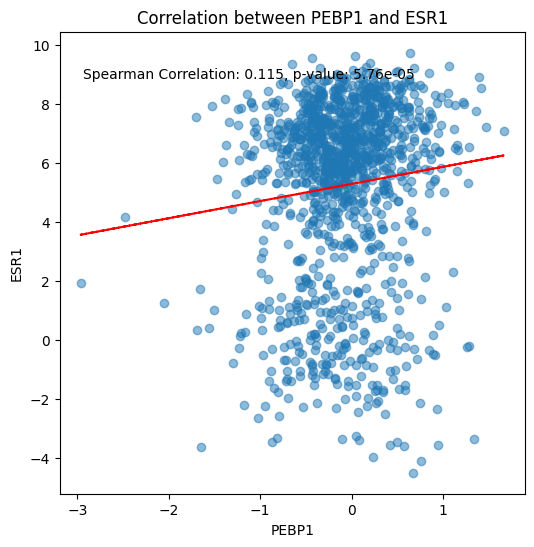

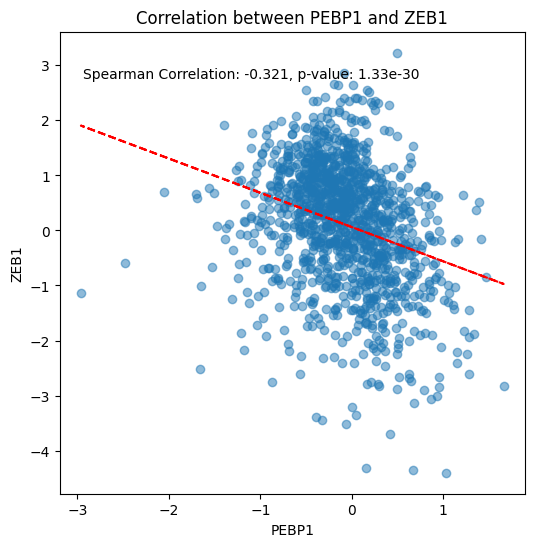

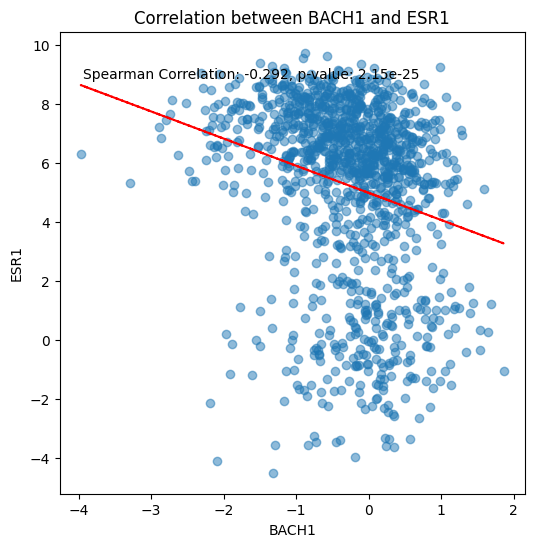

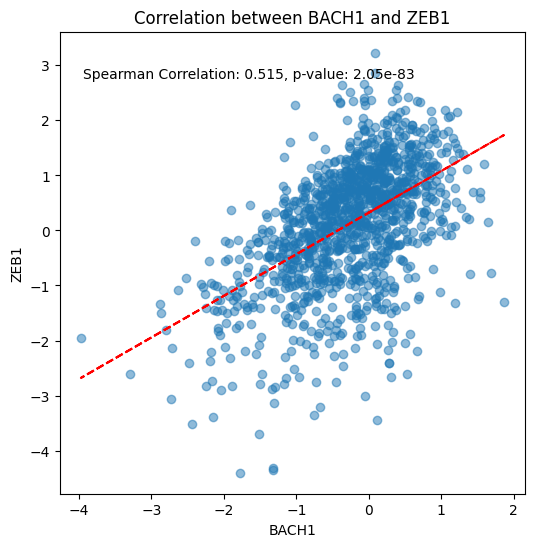

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import numpy as np

gene_pairs = [('PEBP1', 'ESR1'), ('PEBP1', 'ZEB1'), ('BACH1', 'ESR1'), ('BACH1', 'ZEB1')]

for gene1, gene2 in gene_pairs:
    x = tcga_brca[tcga_brca['sample'] == gene1].iloc[:, 1:].values.flatten()
    y = tcga_brca[tcga_brca['sample'] == gene2].iloc[:, 1:].values.flatten()

    # Calculate Spearman correlation and p-value
    correlation, p_value = spearmanr(x, y)

    # Create a scatter plot
    plt.figure(figsize=(6, 6))
    plt.scatter(x, y, alpha=0.5)
    plt.xlabel(gene1)
    plt.ylabel(gene2)
    plt.title(f"Correlation between {gene1} and {gene2}")

    # Add regression line
    z = np.polyfit(x, y, 1) 
    p = np.poly1d(z)
    plt.plot(x, p(x), "r--") 


    # Display correlation and p-value on the plot
    plt.text(0.05, 0.9, f"Spearman Correlation: {correlation:.3f}, p-value: {p_value:.2e}",
             transform=plt.gca().transAxes)

    plt.show()

In [ ]:
%pip install gitpython

In [ ]:
import git
import shutil

# Clone the repository
repo_url = "https://github.com/saishyam1/RKIP_BACH1_Data_Codes/"
repo_dir = "./Figure1_2"
git.Repo.clone_from(repo_url, repo_dir)

shutil.move(f"{repo_dir}", "./")

shutil.rmtree(repo_dir)

In [ ]:
rpms = pd.read_csv("/content/Figure2E/Gene_Signatures/GenSig_RKIP_Metastasis.gmt", sep = "\t").iloc[:,1:]

bpms = pd.read_csv("/content/Figure2E/Gene_Signatures/BACH1_Metastasis.gmt", sep = "\t").iloc[:,2:15]

pdl1 = pd.read_csv("/content/Figure2E/Gene_Signatures/GenSig_PD-L1.gmt", sep = "\t").iloc[:,2:]

In [ ]:
%pip install gseapy

In [ ]:
tcga_brca.set_index('sample', inplace=True)

In [ ]:
import gseapy as gp

# Combine all gene sets into a dictionary
gene_sets_dict = {
    'rpms': rpms.columns.tolist(),
    'bpms': bpms.columns.tolist(),
    'pdl1': pdl1.columns.tolist()
}

# Perform ssGSEA
ssgsea_scores = gp.ssgsea(data=tcga_brca, gene_sets=gene_sets_dict, sample_norm_method='rank', outdir="./", min_size=10)
ssgsea_df = ssgsea_scores.res2d


In [ ]:
ssgsea_df

,Name,Term,ES,NES
0,TCGA-AO-A128-01,pdl1,9860.701771,0.533596
1,TCGA-A2-A25F-01,pdl1,9834.562611,0.532182
2,TCGA-AR-A1AW-01,pdl1,9825.849888,0.53171
3,TCGA-C8-A12V-01,pdl1,9728.209355,0.526427
4,TCGA-AR-A1AJ-01,pdl1,9669.154516,0.523231
...,...,...,...,...
3649,TCGA-E2-A14Y-01,pdl1,4.500167,0.000244
3650,TCGA-A2-A3XV-01,rpms,-3.890132,-0.000211
3651,TCGA-D8-A1Y2-01,bpms,-1.562943,-0.000085
3652,TCGA-BH-A0DZ-11,bpms,1.534692,0.000083


In [ ]:
rpms_scores = pd.to_numeric(ssgsea_df[ssgsea_df['Term'] == 'rpms']['NES'].values)
bpms_scores = pd.to_numeric(ssgsea_df[ssgsea_df['Term'] == 'bpms']['NES'].values)
pdl1_scores = pd.to_numeric(ssgsea_df[ssgsea_df['Term'] == 'pdl1']['NES'].values)


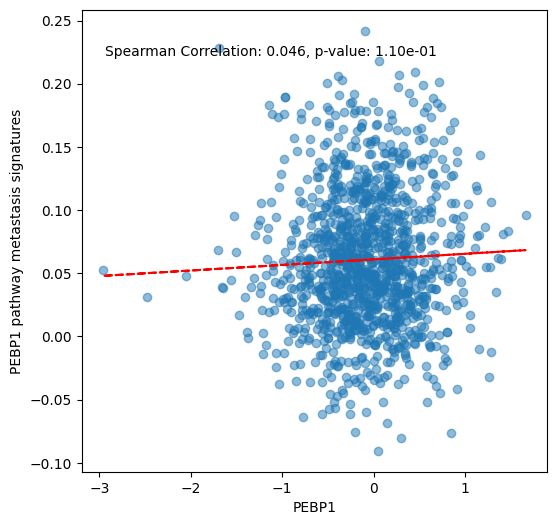

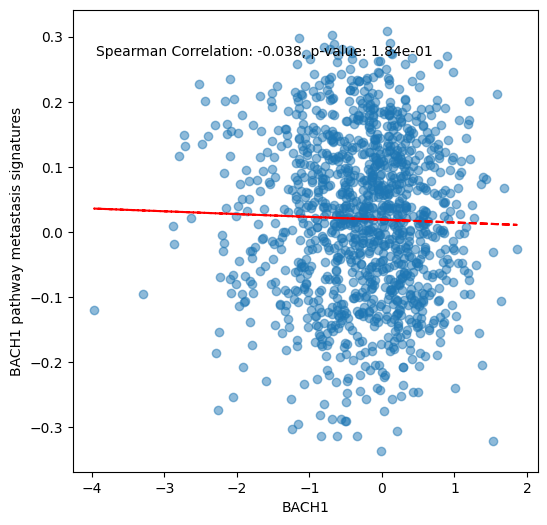

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import numpy as np


pairs = [('PEBP1', rpms_scores), ('BACH1', bpms_scores)]

for gene1, gene2 in pairs:
    x = tcga_brca.loc[gene1, :].values.flatten()
    y = gene2

    # Calculate Spearman correlation and p-value
    correlation, p_value = spearmanr(x, y)

    # Create a scatter plot
    plt.figure(figsize=(6, 6))
    plt.scatter(x, y, alpha=0.5)
    plt.xlabel(gene1)
    plt.ylabel(gene1 + " pathway metastasis signatures")

    # Add regression line
    z = np.polyfit(x, y, 1) 
    p = np.poly1d(z) 
    plt.plot(x, p(x), "r--") 


    # Display correlation and p-value on the plot
    plt.text(0.05, 0.9, f"Spearman Correlation: {correlation:.3f}, p-value: {p_value:.2e}",
             transform=plt.gca().transAxes)

    plt.show()

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import numpy as np


pairs = [(pdl1_scores, rpms_scores), (pdl1_scores, bpms_scores)]

for score1, score2 in pairs:
    x = score1
    y = score2

    # Calculate Spearman correlation and p-value
    correlation, p_value = spearmanr(x, y)

    # Create a scatter plot
    plt.figure(figsize=(6, 6))
    plt.scatter(x, y, alpha=0.5)
    plt.xlabel("PD-L1 gene signatures")
    plt.ylabel("Pathway metastasis signatures")

    # Add regression line
    z = np.polyfit(x, y, 1) 
    p = np.poly1d(z) 
    plt.plot(x, p(x), "r--") 
    plt.text(0.05, 0.9, f"Spearman Correlation: {correlation:.3f}, p-value: {p_value:.2e}",
             transform=plt.gca().transAxes)

    plt.show()

In [ ]:
print(pdl1_scores)
print(bpms_scores)
print(rpms_scores)

[ 5.33596294e-01  5.32181815e-01  5.31710339e-01 ... -1.35745667e-03
  2.43519422e-04 -2.59519703e-05]
[-3.36668474e-01 -3.22419218e-01 -3.14608612e-01 ...  3.20453016e-04
 -8.45762156e-05  8.30474552e-05]
[ 2.41936978e-01  2.28065636e-01  2.17635678e-01 ... -2.87834545e-04
 -2.84077065e-04 -2.10508343e-04]
